In [1]:
import pandas as pd
import numpy as np

# import the visualization package
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import pylab as plot

# Algorithms

# machine learning
from sklearn.linear_model import LogisticRegression # Logistic Regression
#from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # Knn
from sklearn.tree import DecisionTreeClassifier # Decision Tree


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Analysing missing values TRAIN:

def dt_analyses(df):
    
    
    types = df.dtypes
    #corr = df.corr()['SalePrice'] ,'Corr_Coef' , corr
    counts = df.apply(lambda a: a.count())
    nulls = df.apply(lambda a: a.isnull().sum())
    nulls_perc = nulls/(counts+nulls)*100
    distincts = df.apply(lambda a: a.unique().shape[0])
  
    str = pd.concat([types, counts,nulls,  nulls_perc, distincts], axis = 1, sort=False)
    str.columns = ['Type', 'Counts', 'Nulls_values', 'nulls_perc', 'distincts']
    
    return str

In [4]:
df1 = dt_analyses(train)
df1 = df1.sort_values('Nulls_values', ascending = False).head(17)
df1

,Type,Counts,Nulls_values,nulls_perc,distincts
Cabin,object,204,687,77.104377,148
Age,float64,714,177,19.865320,89
Embarked,object,889,2,0.224467,4
PassengerId,int64,891,0,0.000000,891
Survived,int64,891,0,0.000000,2
Pclass,int64,891,0,0.000000,3
Name,object,891,0,0.000000,891
Sex,object,891,0,0.000000,2
SibSp,int64,891,0,0.000000,7
Parch,int64,891,0,0.000000,7


In [5]:
# Analysing missing values TEST:

df1 = dt_analyses(test)
df1 = df1.sort_values('Nulls_values', ascending = False).head(17)
df1


,Type,Counts,Nulls_values,nulls_perc,distincts
Cabin,object,91,327,78.229665,77
Age,float64,332,86,20.574163,80
Fare,float64,417,1,0.239234,170
PassengerId,int64,418,0,0.000000,418
Pclass,int64,418,0,0.000000,3
Name,object,418,0,0.000000,418
Sex,object,418,0,0.000000,2
SibSp,int64,418,0,0.000000,7
Parch,int64,418,0,0.000000,8
Ticket,object,418,0,0.000000,363


In [6]:
# Action:

# Missing Values: let's assume that if it is empty there is no cabin:
data = [test, train]
for dt in data:
    
    dt['Cabin'] = dt['Cabin']. replace(np.nan, 'N')
    dt['Cabin']  = dt['Cabin'].str.get(0)
    dt['Cabin'].replace('T', 'N', inplace = True)

In [7]:
# Missing Values: age values with randon mean values:

data = [test, train]
for dt in data:

    mean = dt['Age'].mean()
    std = dt["Age"].std()
    null = dt["Age"].isnull().sum()

    randon = np.random.randint(mean - std, mean + std, size = null)

    age_copy = dt['Age'].copy()
    is_null = np.isnan(age_copy)

    age_copy[is_null] = randon

    dt['Age'] = age_copy

In [8]:
# Replacing Embarked values to the most comon value (S):
train['Embarked'] = train['Embarked'].replace(np.NaN, 'S')

test['Fare'] = test['Fare'].replace(np.NaN, '0')


In [9]:
# Analysing missing values after the modifications TRAIN:
df1 = dt_analyses(train)
df1 = df1.sort_values('distincts', ascending = False).head(17)
df1


,Type,Counts,Nulls_values,nulls_perc,distincts
PassengerId,int64,891,0,0.0,891
Name,object,891,0,0.0,891
Ticket,object,891,0,0.0,681
Fare,float64,891,0,0.0,248
Age,float64,891,0,0.0,88
Cabin,object,891,0,0.0,8
SibSp,int64,891,0,0.0,7
Parch,int64,891,0,0.0,7
Pclass,int64,891,0,0.0,3
Embarked,object,891,0,0.0,3


In [10]:
# Analysing missing values after the modifications TEST:

df1 = dt_analyses(test)
df1 = df1.sort_values('distincts', ascending = False).head(17)

test['Fare'] = test['Fare'].astype(float)

df1


,Type,Counts,Nulls_values,nulls_perc,distincts
PassengerId,int64,418,0,0.0,418
Name,object,418,0,0.0,418
Ticket,object,418,0,0.0,363
Fare,object,418,0,0.0,170
Age,float64,418,0,0.0,79
Parch,int64,418,0,0.0,8
Cabin,object,418,0,0.0,8
SibSp,int64,418,0,0.0,7
Pclass,int64,418,0,0.0,3
Embarked,object,418,0,0.0,3


In [11]:
data = [train, test]

for dt in data:
    dt['Sex'] = dt['Sex'].replace('male', '1')
    dt['Sex'] = dt['Sex'].replace('female', '0')
    
    dt.rename(columns={'Sex': 'Male'}, inplace = True)
    
    #creating a column for relatives
    dt['Relatives'] = dt['Parch']+dt['SibSp']


In [12]:
# Creating a categorical column for Title:

train[['Last Name', 'Title_I' , 'First_Name' ]] = train['Name'].str.split(' ', expand=True,n=2)
test[['Last Name', 'Title_I' , 'First_Name' ]] = test['Name'].str.split(' ', expand=True,n=2)

In [13]:
def Title(value):    
    Title_I = value    
    AB = ['Mr.', 'Miss.', 'Mrs.', 'Rev.', 'Dr.', 'Master.']
    if value in AB:
        return value
    else:
        return 'Other'  
    
#, 'Ms', 'Col.', 'Mlle.', ', , 'Mme.', 'Ms.'

In [14]:
train['Title'] = train['Title_I'].apply(Title) 
test['Title'] = test['Title_I'].apply(Title) 

In [15]:
categorical_train = ['Male', 'Pclass', 'Cabin', 'Embarked', 'Title']

numeric_train = ['Age']

not_used = ['Ticket', 'Fare']


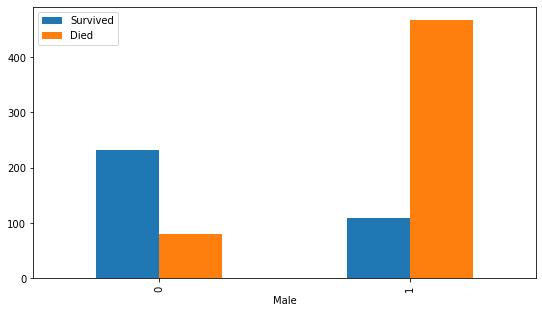

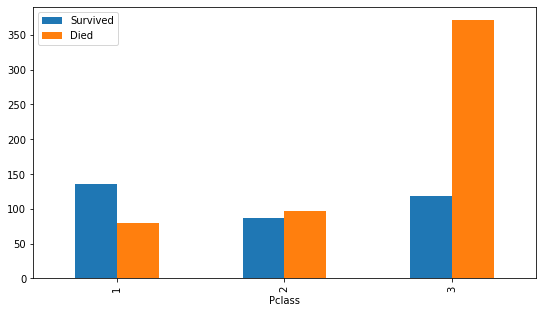

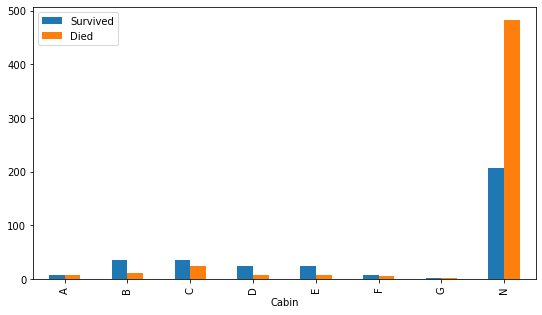

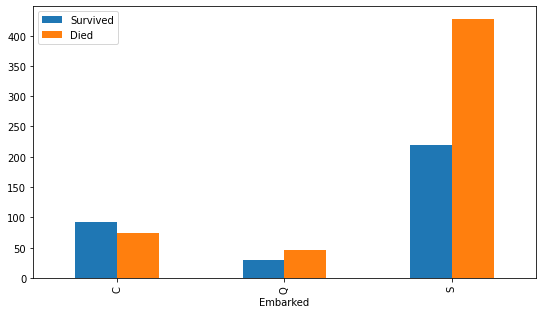

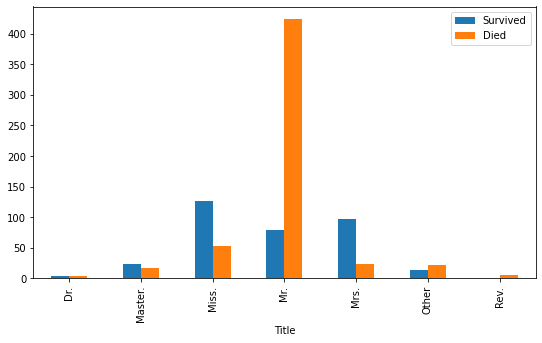

In [16]:
train['Died'] = 1- train['Survived']

for c in categorical_train:
    a = train.groupby(c).agg('sum')[['Survived', 'Died']]
    a.plot(kind='bar', figsize=(9, 5),stacked=False)

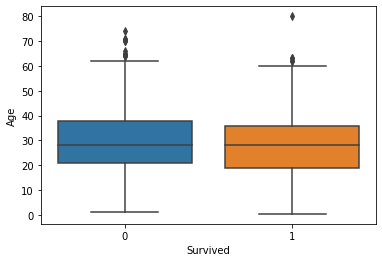

In [17]:
# Analysing numeric variables 

import seaborn as sns
for n in numeric_train:
        
    b = sns.boxplot(x = 'Survived', y = n , data = train)
    plt.show()

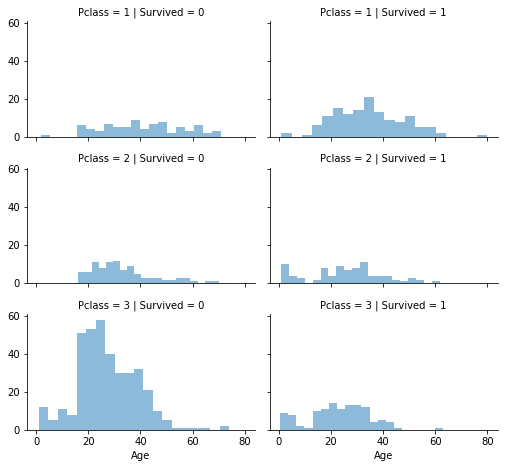

In [18]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height= 2.2 , aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [19]:
column_names = ["Male", 'Pclass' , 'Survived']
group = ['Male', 'Pclass']
stat = train[column_names].groupby(group, as_index=False).mean()
stat.sort_values(by='Survived', ascending=False).tail(40)

,Male,Pclass,Survived
0,0,1,0.968085
1,0,2,0.921053
2,0,3,0.500000
3,1,1,0.368852
4,1,2,0.157407
5,1,3,0.135447


Correcting.

1 - Ticket feature may be dropped from our analysis as it contains high ratio of duplicates

2 - Cabin feature will be used because of the assumption of changing null values. 

3 - PassengerId may be dropped from training dataset as it does not contribute to survival.

4 - Title will be used because the modification that have been done.

In [20]:
# Get Dummies TRAIN

a = pd.get_dummies(train['Cabin'], prefix = 'C')
b = pd.get_dummies(train['Relatives'], prefix = 'R')
c = pd.get_dummies(train['Pclass'], prefix = 'P')
d = pd.get_dummies(train['Embarked'], prefix = 'E')
e = pd.get_dummies(train['Title'], prefix = 'T')

f_train = c.join(train.Male)

In [21]:
# Get Dummies TEST

a = pd.get_dummies(test['Cabin'], prefix = 'C')
b = pd.get_dummies(test['Relatives'], prefix = 'R')
c = pd.get_dummies(test['Pclass'], prefix = 'P')
d = pd.get_dummies(test['Embarked'], prefix = 'E')
e = pd.get_dummies(test['Title'], prefix = 'T')

f_test = c.join(test.Male)


In [22]:
# Numeric Variables Normalization Process 

data = [train, test]

Numeric = ['Age']


for i in Numeric:
    train[i] = (train[i]-train[i].min())/(train[i].max()-train[i].min())
    test[i] = (test[i]-test[i].min())/(test[i].max()-test[i].min())


In [23]:
# Add numeric variables in train dataset
f_train = f_train.join(train.Age)
f_train

,P_1,P_2,P_3,Male,Age
0,0,0,1,1,0.271174
1,1,0,0,0,0.472229
2,0,0,1,0,0.321438
3,1,0,0,0,0.434531
4,0,0,1,1,0.434531
...,...,...,...,...,...
886,0,1,0,1,0.334004
887,1,0,0,0,0.233476
888,0,0,1,0,0.522493
889,1,0,0,1,0.321438


In [24]:
# Add numeric variables in test dataset
f_test = f_test.join(test.Age)
f_test

,P_1,P_2,P_3,Male,Age
0,0,0,1,1,0.452723
1,0,0,1,0,0.617566
2,0,1,0,1,0.815377
3,0,0,1,1,0.353818
4,0,0,1,0,0.287881
...,...,...,...,...,...
413,0,0,1,1,0.393380
414,1,0,0,0,0.512066
415,0,0,1,1,0.505473
416,0,0,1,1,0.235131


In [25]:
# FINAL DATASETS:

x_train = f_train
y_train = train.Survived

x_test =  f_test


In [26]:
# Knn

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

Y_pred = knn.predict(x_test)

knn.score(x_train, y_train)


0.8327721661054994

In [27]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':Y_pred})
submission
submission.to_csv('Titanic_knn.csv',index=False)

In [28]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=20)
random_forest.fit(x_train, y_train)

Y_pred = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

random_forest.score(x_train, y_train)


0.8080808080808081

In [29]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':Y_pred})
submission
submission.to_csv('Titanic_RandomForest.csv',index=False)

In [30]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

Y_pred = decision_tree.predict(x_test)

decision_tree.score(x_train, y_train)

0.8810325476992144

In [31]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':Y_pred})
submission
submission.to_csv('Titanic_DecisionTree.csv',index=False)

In [32]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
logreg.score(x_train, y_train) 


0.7867564534231201

In [33]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':Y_pred})
submission
submission.to_csv('Titanic_LogisticRegression.csv',index=False)

In [34]:
#https://www.kaggle.com/startupsci/titanic-data-science-solutions